In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Exercise 1: Basic image processing

### a) Read the image from the file umbrellas.jpg and display it

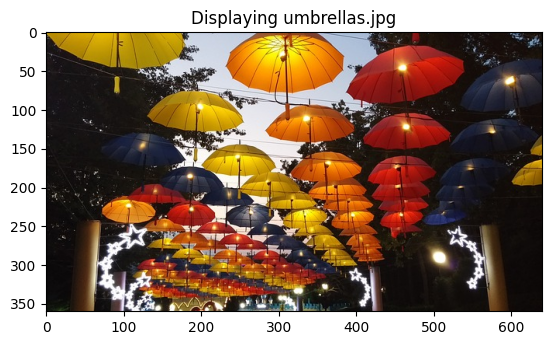

In [2]:
from UZ_utils import *
I1 = imread('images/umbrellas.jpg')
plt.title("Displaying umbrellas.jpg")
imshow(I1)



In [3]:
height, width, channels = I1.shape

In [4]:
height

360

In [5]:
width

640

In [6]:
channels

3

In [7]:
I1.dtype

dtype('float64')

### b) Convert the loaded image to grayscale.

In [8]:
def convert_to_gray(I):
    red = I[:,:,0]
    green = I[:,:,1]
    blue = I[:,:,2]

    return (red + green + blue) / 3

In [9]:
I1_gray = convert_to_gray(I1)

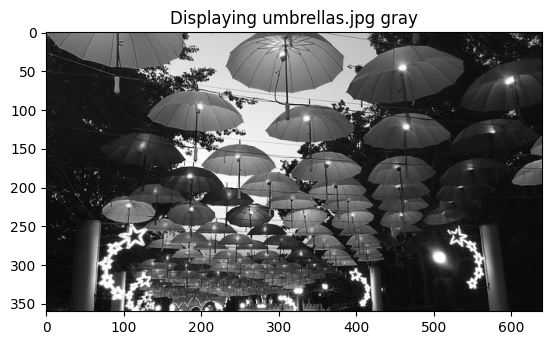

In [10]:
plt.imshow(I1_gray, cmap="gray")
plt.title("Displaying umbrellas.jpg gray")

plt.show()

### c) Cut and display a specific part of the loaded image.

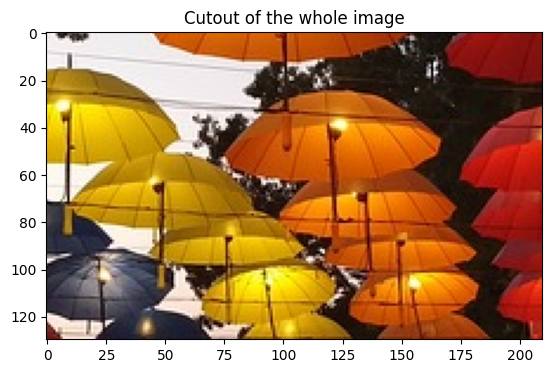

In [11]:
cutout=I1[130:260, 240:450]
plt.imshow(cutout)
plt.title('Cutout of the whole image')
plt.show()

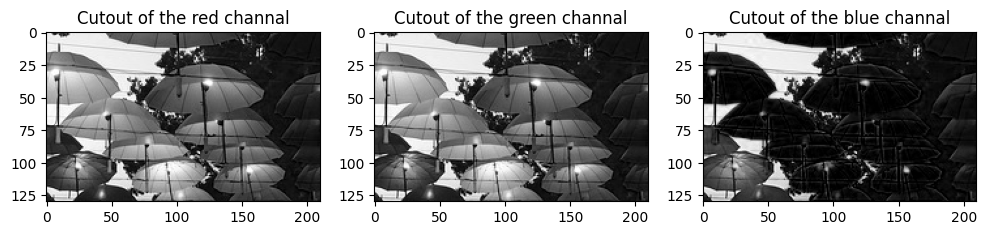

In [12]:
cutout0=I1[130:260, 240:450, 0]
cutout1=I1[130:260, 240:450, 1]
cutout2=I1[130:260, 240:450, 2]
plt.figure(figsize=(12, 6))
plt.subplot(1,3,1) 
plt.imshow(cutout1, cmap="gray")
plt.title('Cutout of the red channal') 
plt.subplot(1,3,2)
plt.imshow(cutout1, cmap="gray")
plt.title('Cutout of the green channal')
plt.subplot(1,3,3)
plt.imshow(cutout2, cmap="gray")
plt.title('Cutout of the blue channal')
plt.show()





### d) Invert a rectangular part of the image

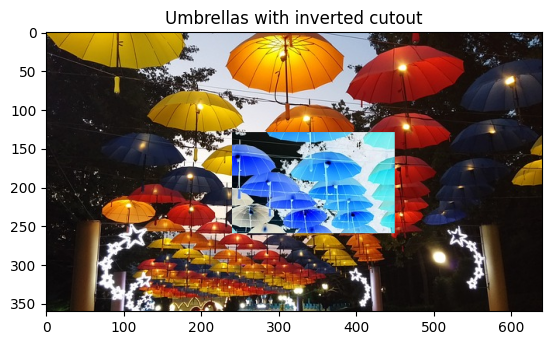

In [13]:
I1[130:260, 240:450] = 1 - I1[130:260, 240:450] 
plt.title("Umbrellas with inverted cutout")

imshow(I1)

### e) Rescale the image values so that the largest possible value is 0.3.

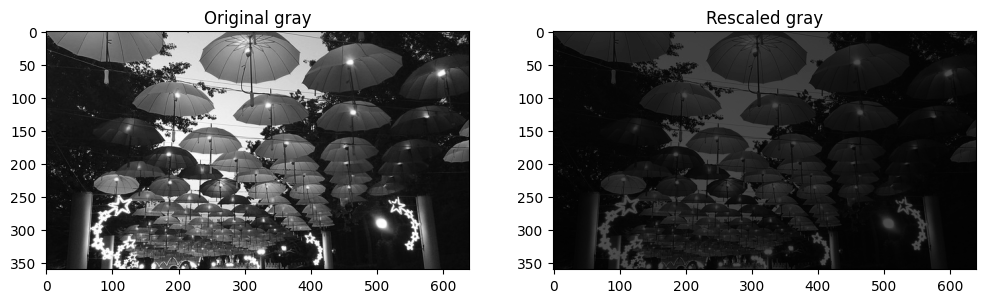

In [14]:
I1_gray_rescaled = I1_gray * 0.3
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1) 
plt.imshow(I1_gray, cmap="gray", vmin=0, vmax=1)
plt.title('Original gray') 
plt.subplot(1,2,2)
plt.imshow(I1_gray_rescaled, cmap="gray", vmin=0, vmax=1)
plt.title('Rescaled gray')
plt.show()


# Exercise 2: Thresholding and histograms

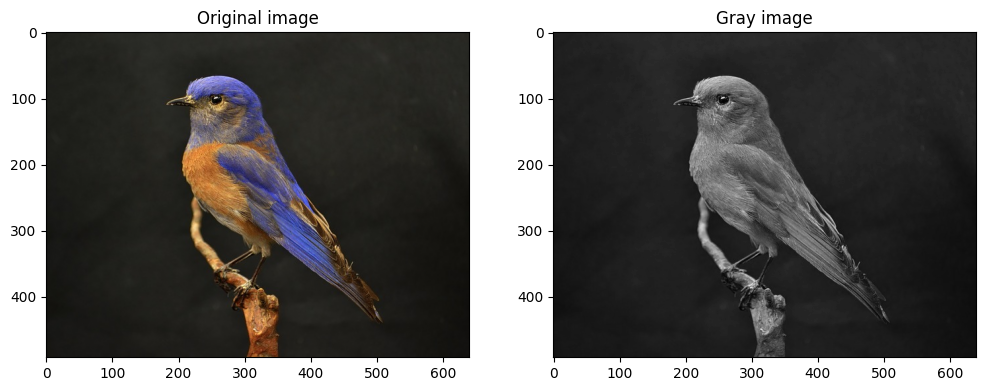

In [15]:
I2 = imread('images/bird.jpg')
I2_gray = convert_to_gray(I2)

plt.figure(figsize=(12, 6))
plt.subplot(1,2,1) 
plt.imshow(I2)
plt.title('Original image') 
plt.subplot(1,2,2)
plt.imshow(I2_gray, cmap="gray")
plt.title('Gray image')
plt.show()

### a) Create a binary mask from a grayscale image.

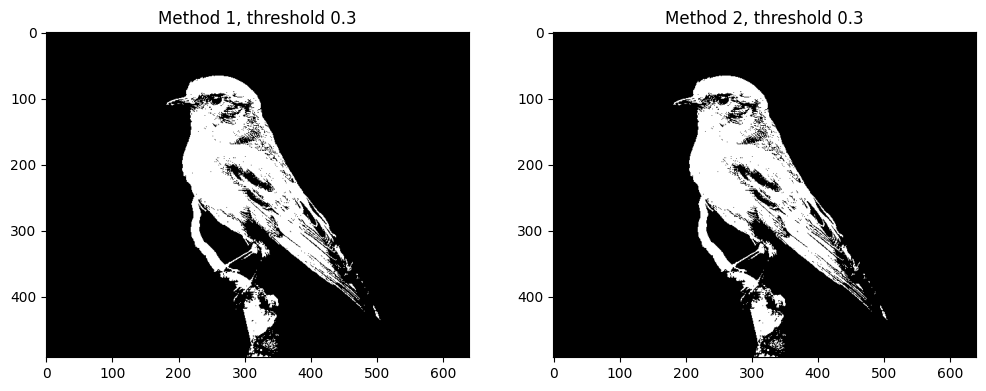

In [16]:
threshold = 0.3
I_t1 = np.copy(I2_gray)
I_t1[I_t1 < threshold] = 0
I_t1[I_t1 >= threshold] = 1

I_t2 = np.where(I2_gray < threshold, 0, 1)

plt.figure(figsize=(12, 6))
plt.subplot(1,2,1) 
plt.imshow(I_t1, cmap="gray")
plt.title("Method 1, threshold 0.3")
plt.subplot(1,2,2) 
plt.imshow(I_t2, cmap="gray")
plt.title("Method 2, threshold 0.3")
plt.show()

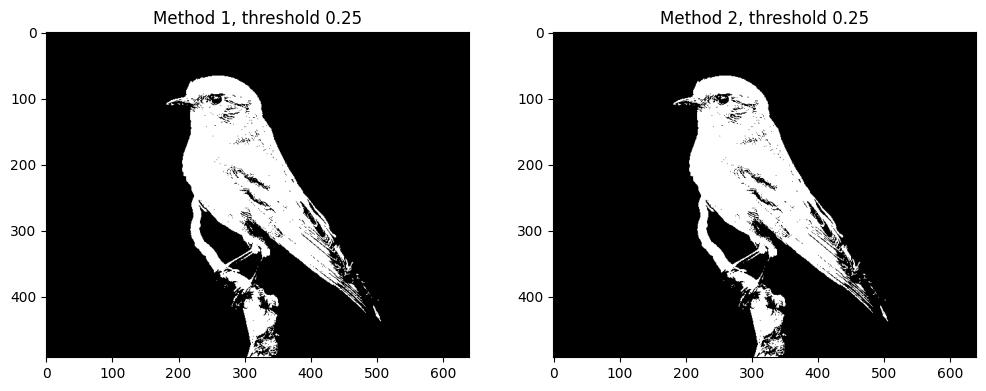

In [17]:
threshold = 0.25
I_t1 = np.copy(I2_gray)
I_t1[I_t1 < threshold] = 0
I_t1[I_t1 >= threshold] = 1

I_t2 = np.where(I2_gray < threshold, 0, 1)

plt.figure(figsize=(12, 6))
plt.subplot(1,2,1) 
plt.imshow(I_t1, cmap="gray")
plt.title("Method 1, threshold 0.25")
plt.subplot(1,2,2) 
plt.imshow(I_t2, cmap="gray")
plt.title("Method 2, threshold 0.25")
plt.show()

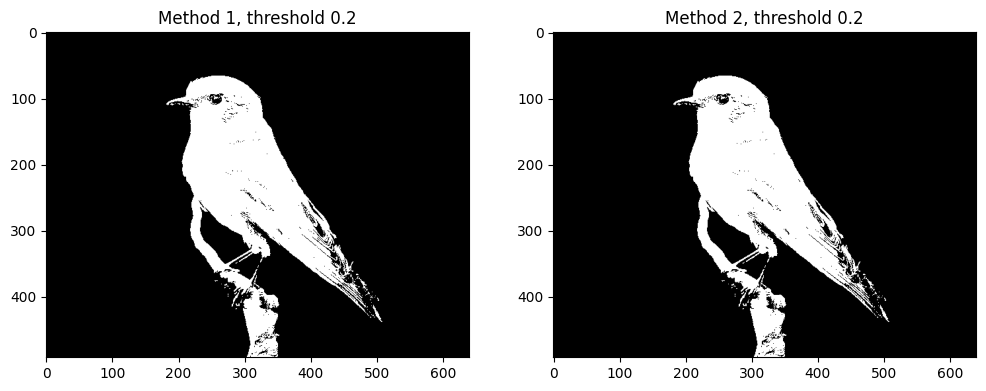

In [18]:
threshold = 0.2
I_t1 = np.copy(I2_gray)
I_t1[I_t1 < threshold] = 0
I_t1[I_t1 >= threshold] = 1

I_t2 = np.where(I2_gray < threshold, 0, 1)

plt.figure(figsize=(12, 6))
plt.subplot(1,2,1) 
plt.imshow(I_t1, cmap="gray")
plt.title("Method 1, threshold 0.2")
plt.subplot(1,2,2) 
plt.imshow(I_t2, cmap="gray")
plt.title("Method 2, threshold 0.2")
plt.show()

In [19]:
def make_mask(image, threshold):
    mask = np.copy(image)
    mask[mask < threshold] = 0
    mask[mask >= threshold] = 1
    return mask    

### b) Write a function myhist that accepts a grayscale image and the number of bins that will be used in building a histogram.

In [20]:
def myhist(img_gray, num_bins):
    H = np.zeros(num_bins)
    I = img_gray.reshape(-1)
    part = 1/num_bins

    for x in I: 
        if x == 1:
            H[num_bins-1] += 1
        else:
            i = int(x/part)
            H[i] += 1
    return H / np.sum(H)



Write a script that calculates and displays histograms for different numbers of bins
using bird.jpg.

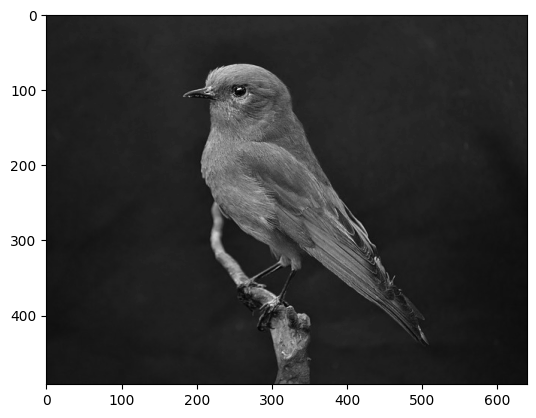

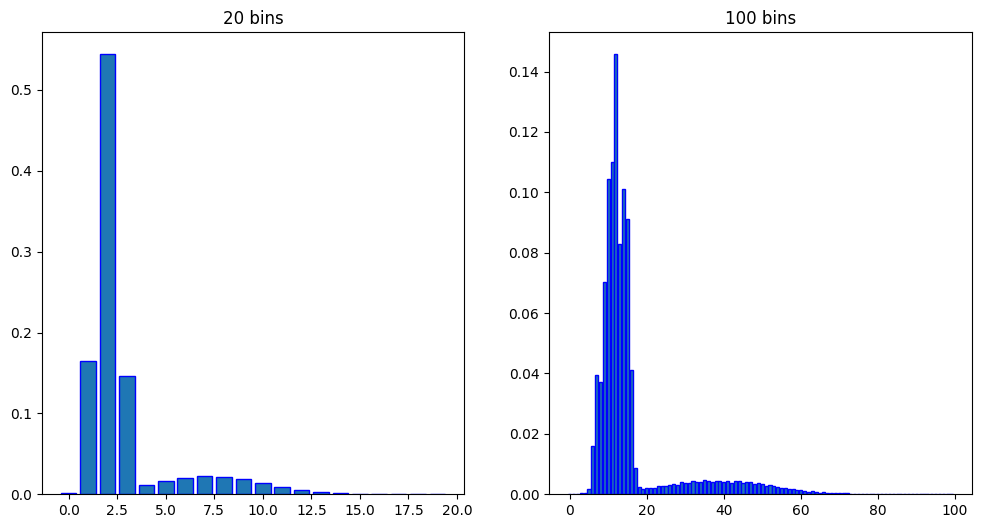

In [21]:
H20 = myhist(I2_gray, 20)
H100 = myhist(I2_gray, 100)

plt.imshow(I2_gray, cmap="gray")
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1) 
plt.bar(range(20), H20, edgecolor='blue')
plt.title('20 bins')
plt.subplot(1,2,2) 
plt.bar(range(100), H100, edgecolor='blue')
plt.title('100 bins')
plt.show()

###  c) Modify your function myhist to no longer assume the [0, 1] range for values. Instead, it should find the maximum and minimum values in the image and calculate the bin ranges based on these values.

In [22]:
def myhist_upgrade(img_gray, num_bins):
    H = np.zeros(num_bins)
    I = img_gray.reshape(-1)
    min = np.min(I)
    max = np.max(I)
    
    part = (max-min)/num_bins

    for x in I: 
        if x == max:
            H[num_bins-1] += 1
        else:
            i = int((x-min)/part)
            H[i] += 1
    return H / np.sum(H)


Show the difference between both versions of the function

Min. value:  0.00130718954248366 , Max. value:  0.9934640522875817


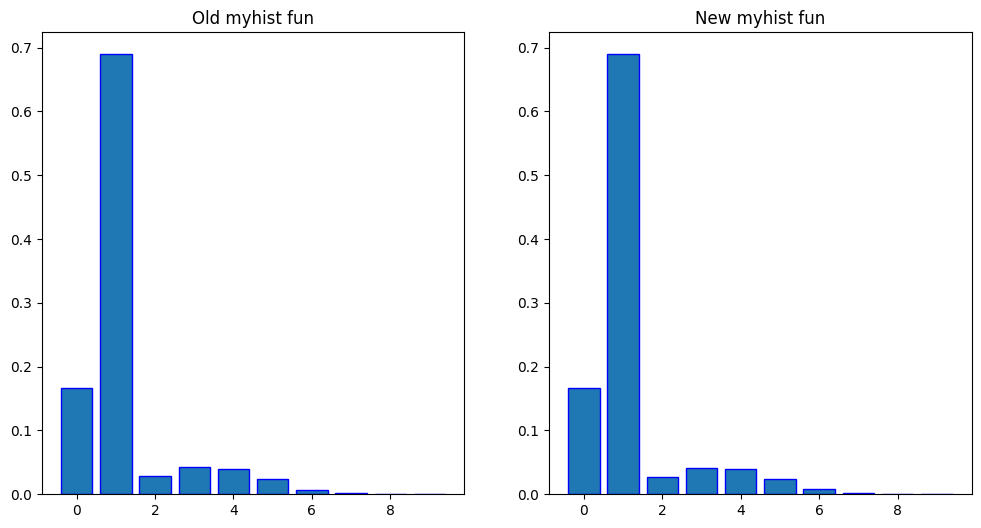

In [23]:
H10 = myhist(I2_gray, 10)
H10_new = myhist_upgrade(I2_gray, 10)

I = I2_gray.reshape(-1)
min = np.min(I2_gray)
max = np.max(I2_gray)
print("Min. value: ",min,", Max. value: ",max)

plt.figure(figsize=(12, 6))
plt.subplot(1,2,1) 
plt.bar(range(10), H10, edgecolor='blue')
plt.title('Old myhist fun')
plt.subplot(1,2,2) 
plt.bar(range(10), H10_new, edgecolor='blue')
plt.title('New myhist fun')
plt.show()

Min. value:  0.5725490196078431 , Max. value:  1.0


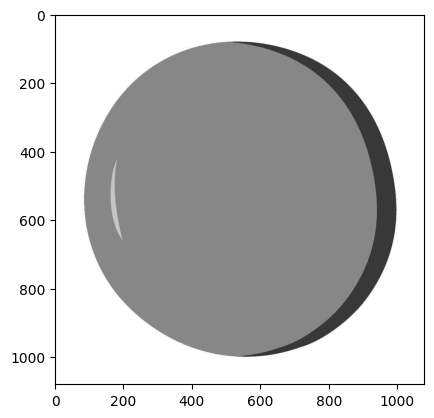

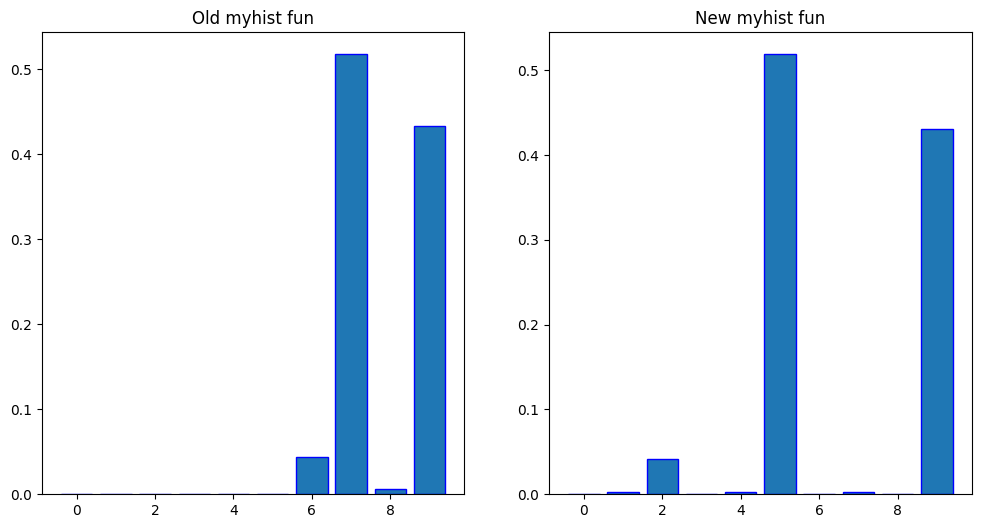

In [24]:
img = imread('images/test.jpg')
img1 = convert_to_gray(img)

H10 = myhist(img1, 10)
H10_new = myhist_upgrade(img1, 10)

I = img1.reshape(-1)
min = np.min(img1)
max = np.max(img1)
print("Min. value: ",min,", Max. value: ",max)

plt.imshow(img1, cmap="gray")
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1) 
plt.bar(range(10), H10, edgecolor='blue')
plt.title('Old myhist fun')
plt.subplot(1,2,2) 
plt.bar(range(10), H10_new, edgecolor='blue')
plt.title('New myhist fun')
plt.show()

Min. value:  0.7777777777777778 , Max. value:  1.0


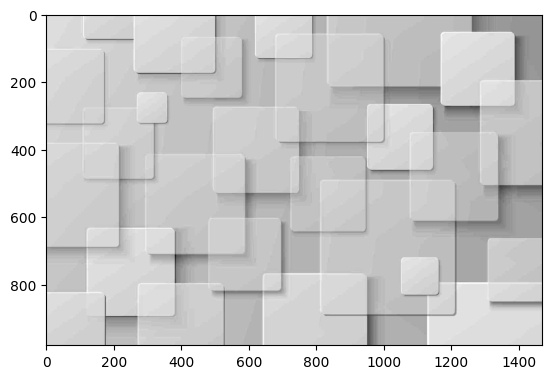

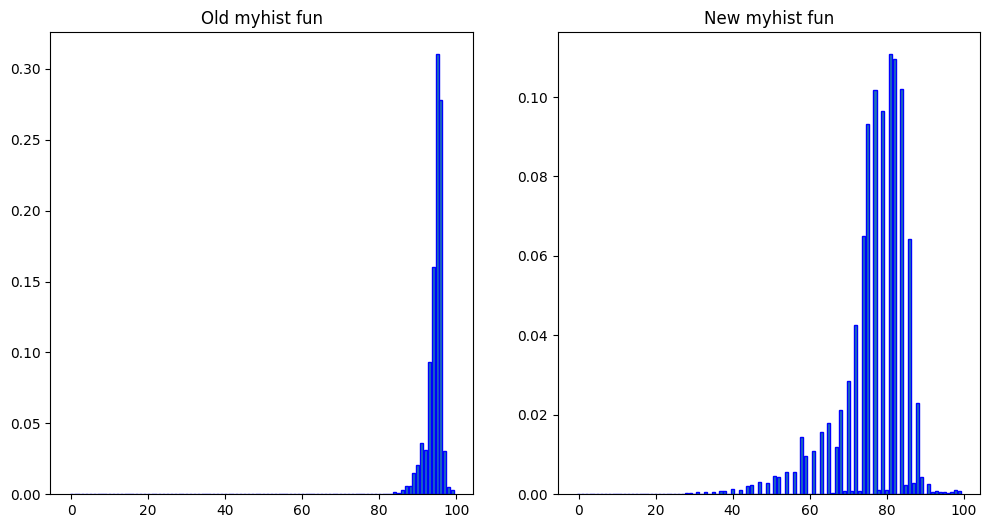

In [25]:
img = imread('images/test1.jpg')
img1 = convert_to_gray(img)

H100 = myhist(img1, 100)
H100_new = myhist_upgrade(img1, 100)

I = img1.reshape(-1)
min = np.min(img1)
max = np.max(img1)
print("Min. value: ",min,", Max. value: ",max)

plt.imshow(img1, cmap="gray")
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1) 
plt.bar(range(100), H100, edgecolor='blue')
plt.title('Old myhist fun')
plt.subplot(1,2,2) 
plt.bar(range(100), H100_new, edgecolor='blue')
plt.title('New myhist fun')
plt.show()

Min. value:  0.4705882352941176 , Max. value:  0.8588235294117647


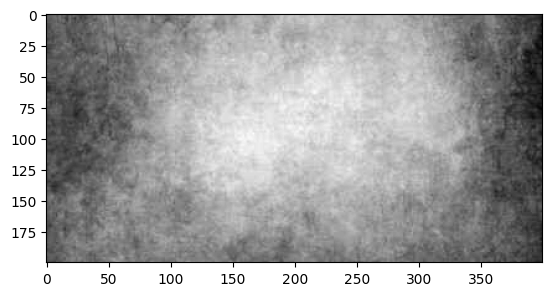

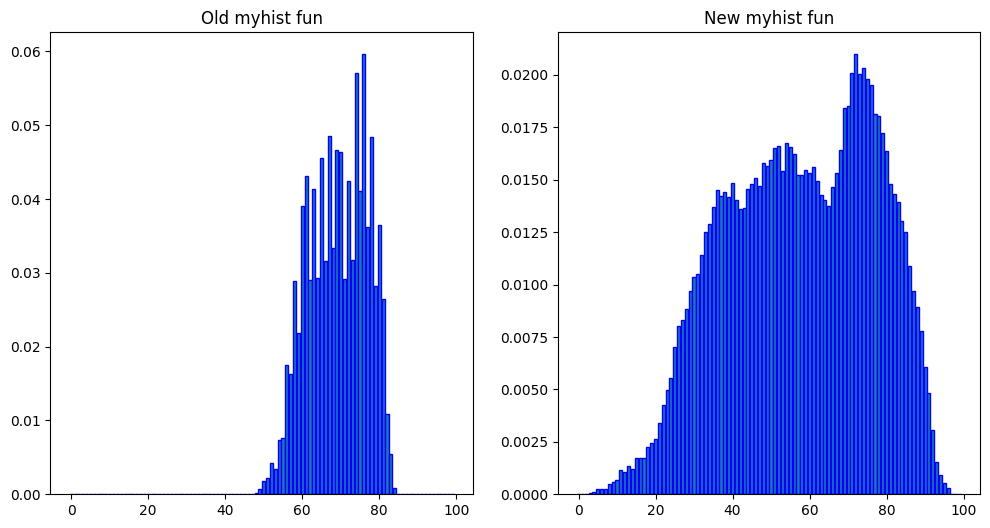

In [26]:
img = imread('images/test2.jpg')
img1 = convert_to_gray(img)

H100 = myhist(img1, 100)
H100_new = myhist_upgrade(img1, 100)

I = img1.reshape(-1)
min = np.min(img1)
max = np.max(img1)
print("Min. value: ",min,", Max. value: ",max)

plt.imshow(img1, cmap="gray")
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1) 
plt.bar(range(100), H100, edgecolor='blue')
plt.title('Old myhist fun')
plt.subplot(1,2,2) 
plt.bar(range(100), H100_new, edgecolor='blue')
plt.title('New myhist fun')
plt.show()

### d) Test myhist function on images (three or more) of the same scene in different lighting conditions. 

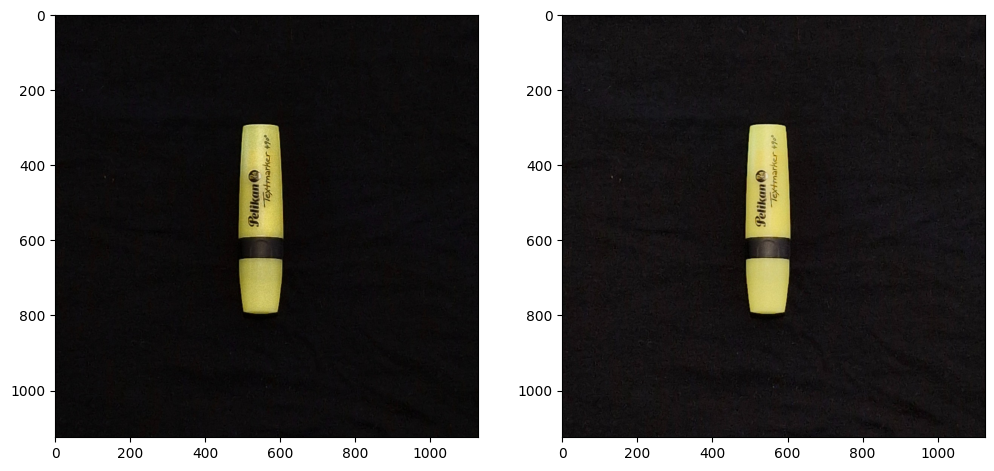

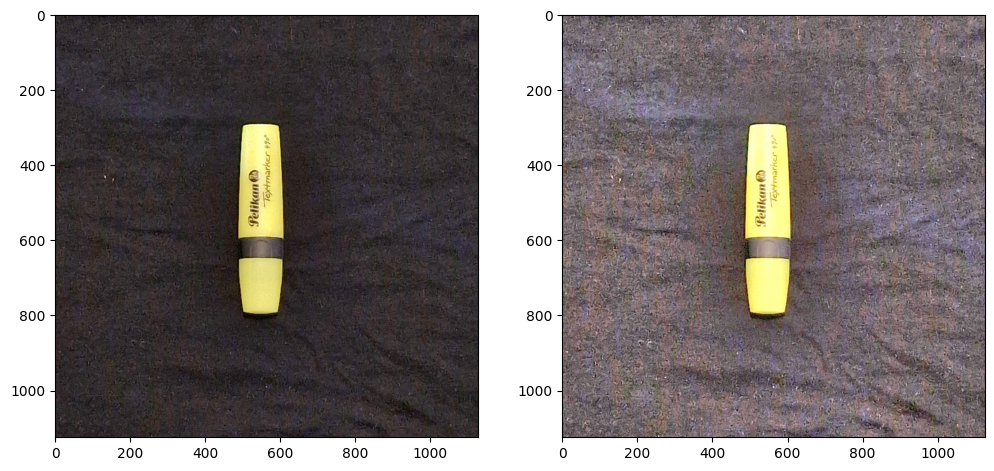

In [27]:
image1 = imread("images/image1.jpg")
g1 = convert_to_gray(image1)
image2 = imread("images/image2.jpg")
g2 = convert_to_gray(image2)
image3 = imread("images/image3.jpg")
g3 = convert_to_gray(image3)
image4 = imread("images/image4.jpg")
g4 = convert_to_gray(image4)

plt.figure(figsize=(12, 6))
plt.subplot(1,2,1) 
plt.imshow(image1)
plt.subplot(1,2,2) 
plt.imshow(image2)
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1) 
plt.imshow(image3)
plt.subplot(1,2,2) 
plt.imshow(image4)
plt.show()



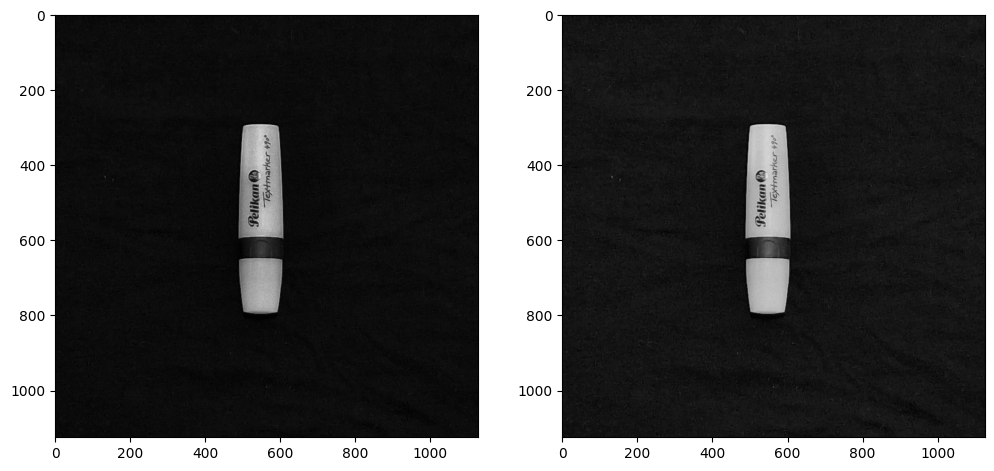

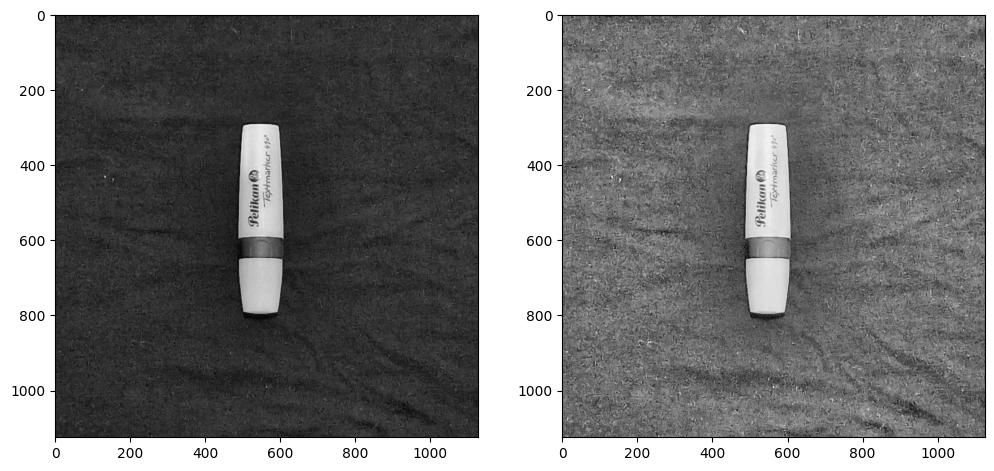

In [28]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1) 
plt.imshow(g1, cmap="gray")
plt.subplot(1,2,2) 
plt.imshow(g2, cmap="gray")
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1) 
plt.imshow(g3, cmap="gray")
plt.subplot(1,2,2) 
plt.imshow(g4, cmap="gray")
plt.show()


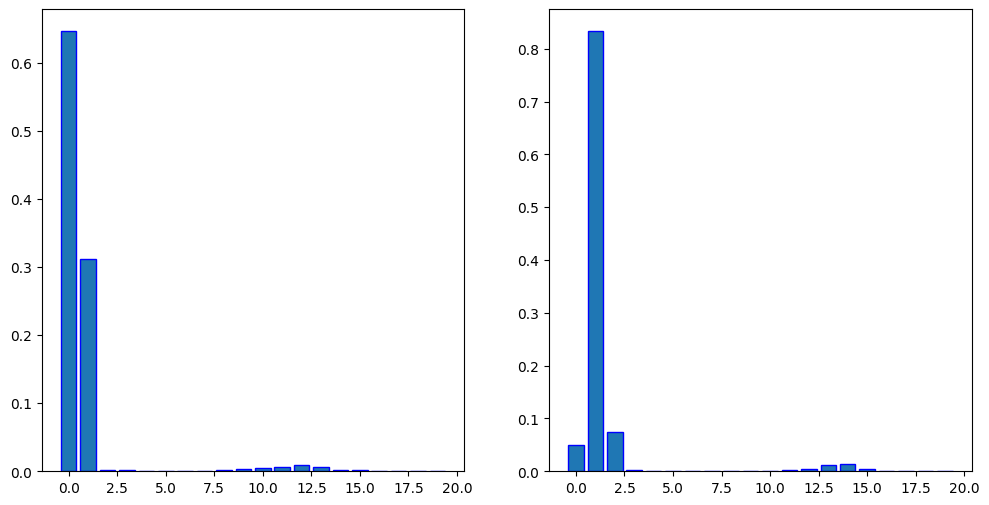

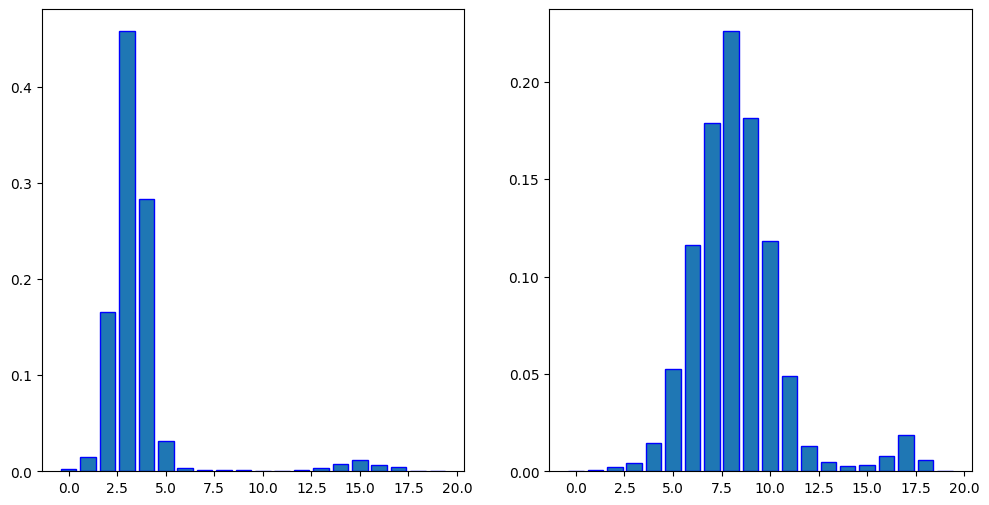

In [29]:
H1 = myhist(g1, 20)
H2 = myhist(g2, 20)
H3 = myhist(g3, 20)
H4 = myhist(g4, 20)

plt.figure(figsize=(12, 6))
plt.subplot(1,2,1) 
plt.bar(range(20), H1, edgecolor='blue')
plt.subplot(1,2,2) 
plt.bar(range(20), H2, edgecolor='blue')
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1) 
plt.bar(range(20), H3, edgecolor='blue')
plt.subplot(1,2,2) 
plt.bar(range(20), H4, edgecolor='blue')
plt.show()

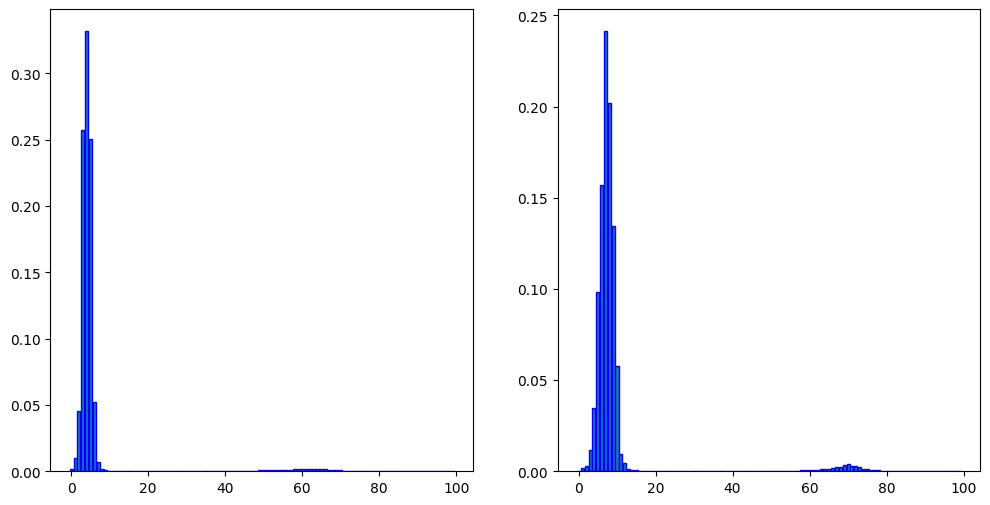

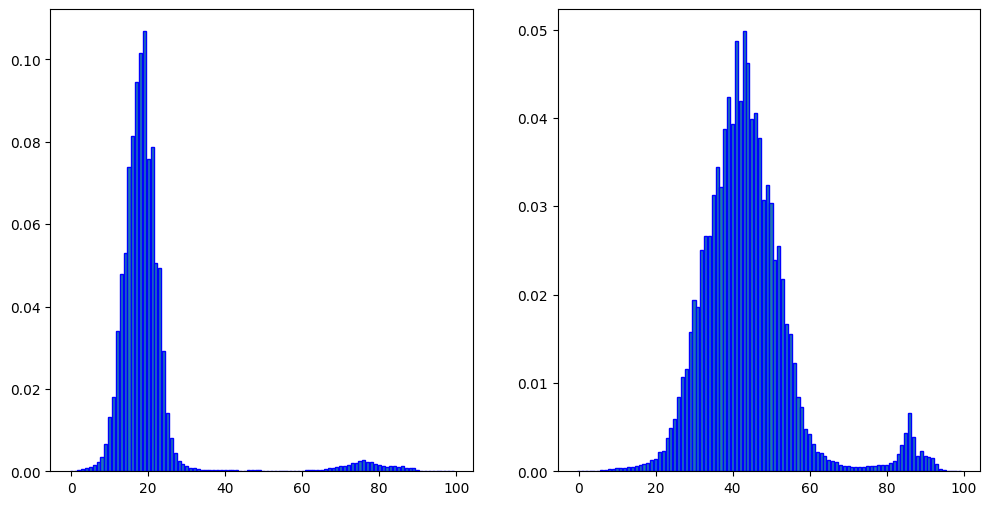

In [30]:
H1 = myhist(g1, 100)
H2 = myhist(g2, 100)
H3 = myhist(g3, 100)
H4 = myhist(g4, 100)

plt.figure(figsize=(12, 6))
plt.subplot(1,2,1) 
plt.bar(range(100), H1, edgecolor='blue')
plt.subplot(1,2,2) 
plt.bar(range(100), H2, edgecolor='blue')
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1) 
plt.bar(range(100), H3, edgecolor='blue')
plt.subplot(1,2,2) 
plt.bar(range(100), H4, edgecolor='blue')
plt.show()

### e) Implement Otsu’s method for automatic threshold calculation.

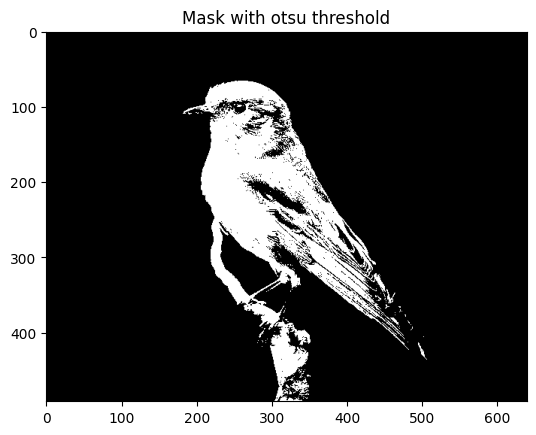

In [31]:
import numpy as np

def otsu(image):
    
    H = myhist(image, 255)
    vkupno = np.sum(H) 
    sum_all = np.dot(np.arange(len(H)), H) 
    sum = 0 
    n1 = 0
    max = 0
    threshold = 0 
    n12 = vkupno 

    for t in range(len(H)):
        n1 += H[t] 
        n2 = vkupno - n1 
        
        if n1 == 0 or n2 == 0: 
            continue

        sum += t * H[t] 
        m1 = sum / n1
        m2 = (sum_all - sum) / n2 

        variance = n1 * n2 * (m1 - m2) ** 2

        if variance > max:
            max = variance
            threshold = t

    return threshold / 255

image = imread_gray("images/bird.jpg")
threshold = otsu(image)

bird_mask = make_mask(image, threshold)

plt.imshow(bird_mask, cmap="gray")
plt.title("Mask with otsu threshold")
plt.show()

    

# Exercise 3: Morphological operations and regions

### a) Perform two basic morphological operations on the image mask.png, erosion and dilation. 

n= 5


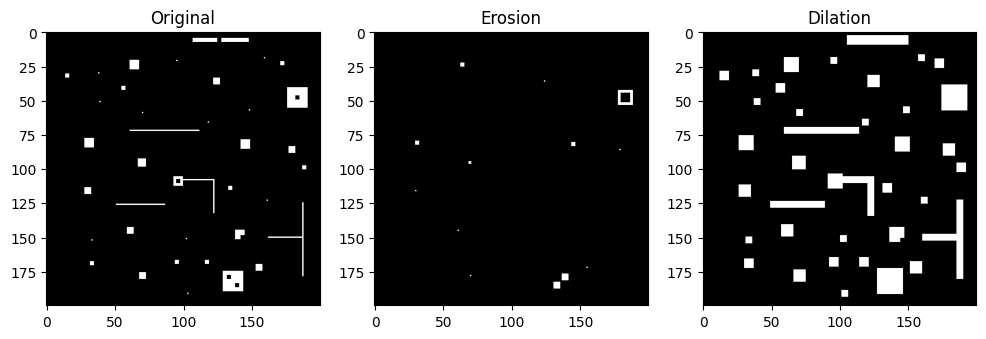

In [32]:
I = imread_gray('images/mask.png')
n = 5
SE = np.ones((n,n))
I_eroded = cv2.erode(I, SE)
I_dilated = cv2.dilate(I, SE)


print("n=",n)

plt.figure(figsize=(12, 6))
plt.subplot(1,3,1) 
plt.imshow(I, cmap="gray")
plt.title('Original')
plt.subplot(1,3,2) 
plt.imshow(I_eroded, cmap="gray")
plt.title("Erosion")
plt.subplot(1,3,3) 
plt.imshow(I_dilated, cmap="gray")
plt.title("Dilation")
plt.show()


n= 2


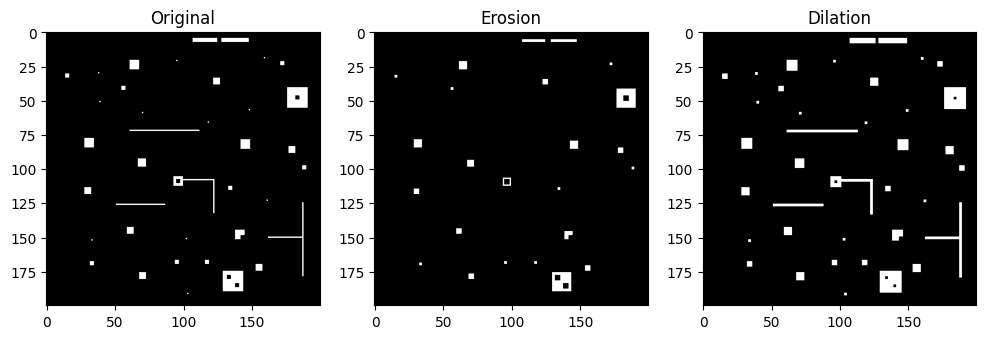

In [33]:
n = 2
SE = np.ones((n,n)) 
I_eroded = cv2.erode(I, SE)
I_dilated = cv2.dilate(I, SE)

print("n=",n)

plt.figure(figsize=(12, 6))
plt.subplot(1,3,1) 
plt.imshow(I, cmap="gray")
plt.title('Original')
plt.subplot(1,3,2) 
plt.imshow(I_eroded, cmap="gray")
plt.title("Erosion")
plt.subplot(1,3,3) 
plt.imshow(I_dilated, cmap="gray")
plt.title("Dilation")
plt.show()

n= 10


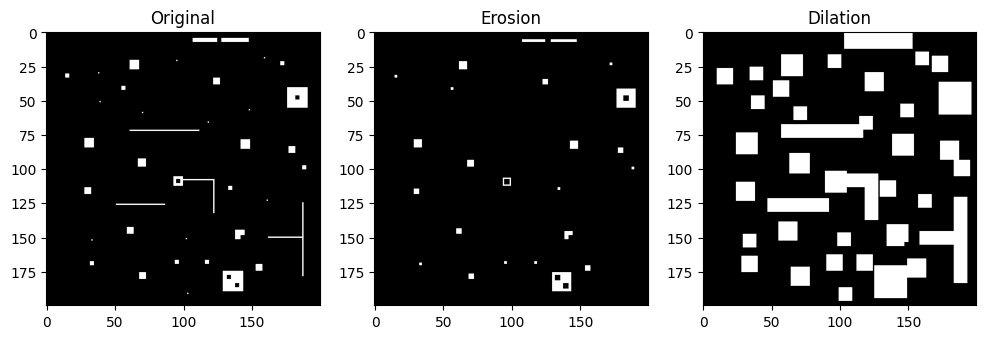

In [34]:
n = 10
SE = np.ones((n,n))
I_dilated = cv2.dilate(I, SE)

print("n=",n)

plt.figure(figsize=(12, 6))
plt.subplot(1,3,1) 
plt.imshow(I, cmap="gray")
plt.title('Original')
plt.subplot(1,3,2) 
plt.imshow(I_eroded, cmap="gray")
plt.title("Erosion")
plt.subplot(1,3,3) 
plt.imshow(I_dilated, cmap="gray")
plt.title("Dilation")
plt.show()

n= 5  -> Opening


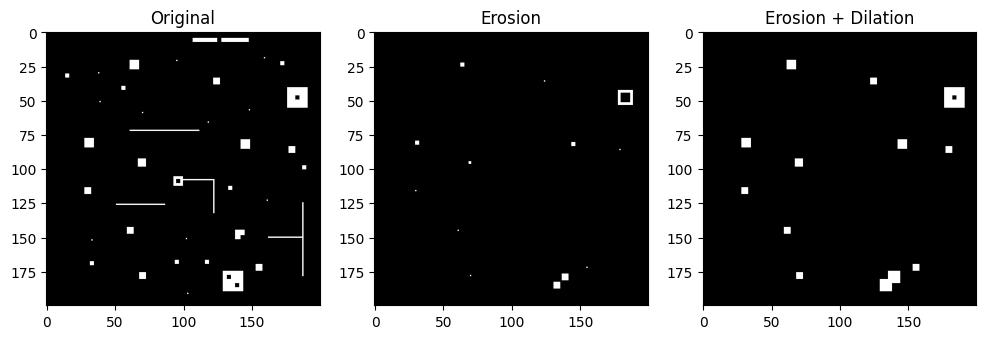

In [35]:
I = imread_gray('images/mask.png')
n = 5
SE = np.ones((n,n)) 
I_eroded = cv2.erode(I, SE)
I_dilated = cv2.dilate(I_eroded, SE)


print("n=",n, " -> Opening")

plt.figure(figsize=(12, 6))
plt.subplot(1,3,1) 
plt.imshow(I, cmap="gray")
plt.title('Original')
plt.subplot(1,3,2) 
plt.imshow(I_eroded, cmap="gray")
plt.title("Erosion")
plt.subplot(1,3,3) 
plt.imshow(I_dilated, cmap="gray")
plt.title("Erosion + Dilation")
plt.show()


n= 5  -> Closing


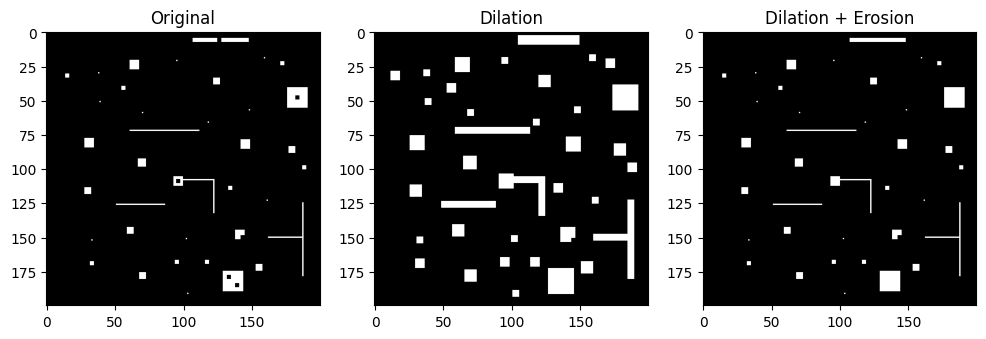

In [36]:
I = imread_gray('images/mask.png')
n = 5
SE = np.ones((n,n)) # create a square structuring element
I_dilated = cv2.dilate(I, SE)
I_eroded = cv2.erode(I_dilated, SE)

print("n=",n, " -> Closing")

plt.figure(figsize=(12, 6))
plt.subplot(1,3,1) 
plt.imshow(I, cmap="gray")
plt.title('Original')
plt.subplot(1,3,2) 
plt.imshow(I_dilated, cmap="gray")
plt.title("Dilation")
plt.subplot(1,3,3) 
plt.imshow(I_eroded, cmap="gray")
plt.title("Dilation + Erosion")
plt.show()

n= 5


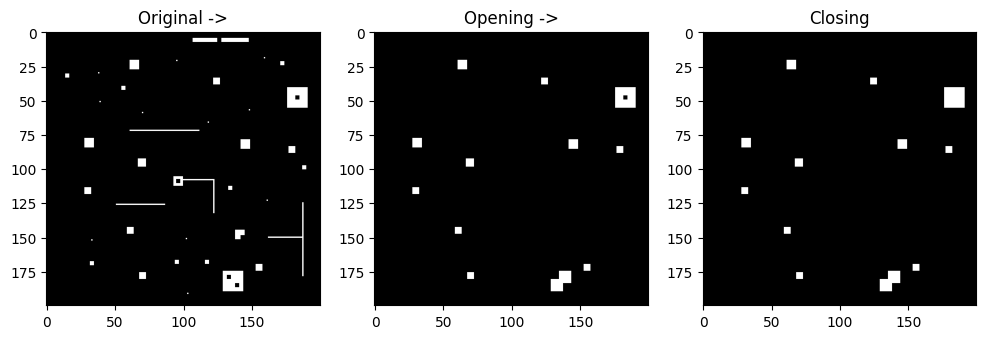

In [37]:
I = imread_gray('images/mask.png')
n = 5
SE = np.ones((n,n)) # create a square structuring element
I_eroded = cv2.erode(I, SE)
I_opening = cv2.dilate(I_eroded, SE)
I_dilated = cv2.dilate(I_opening, SE)
I_closing = cv2.erode(I_dilated, SE)

print("n=",n)

plt.figure(figsize=(12, 6))
plt.subplot(1,3,1) 
plt.imshow(I, cmap="gray")
plt.title('Original ->')
plt.subplot(1,3,2) 
plt.imshow(I_opening, cmap="gray")
plt.title("Opening ->")
plt.subplot(1,3,3) 
plt.imshow(I_closing, cmap="gray")
plt.title("Closing")
plt.show()


### b) Try to clean up the mask of the image bird.jpg using morphological operations.

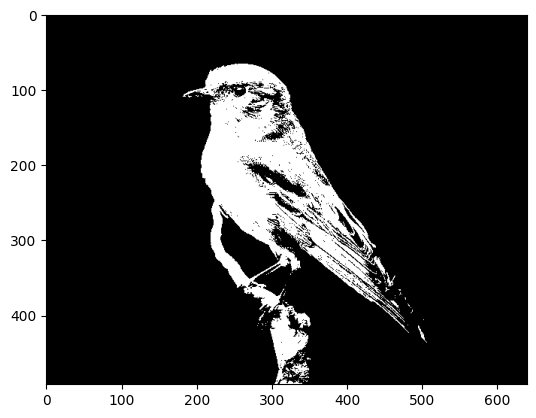

In [38]:
plt.imshow(bird_mask, cmap="gray")
plt.show()

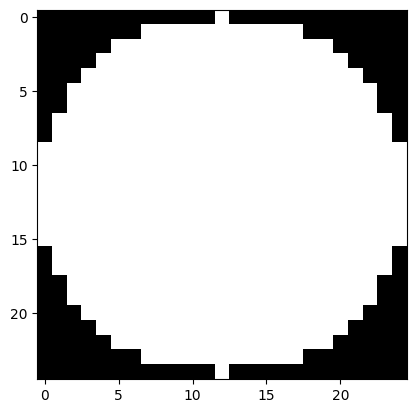

In [39]:
n=25
SE = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(n,n))
plt.imshow(SE, cmap="gray")
plt.show()

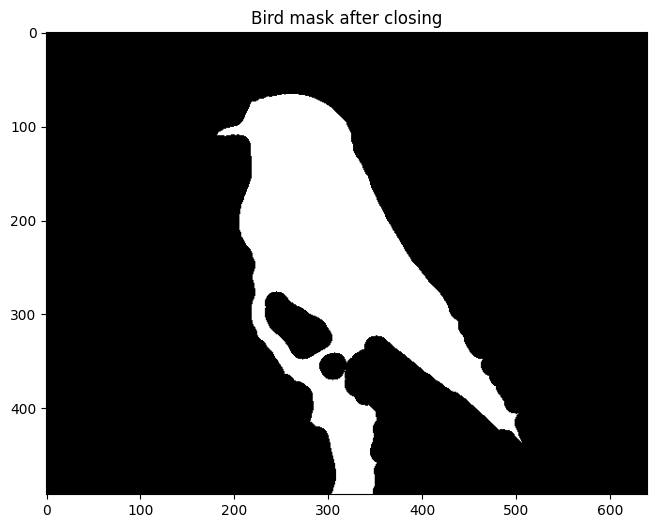

In [40]:
I_dilated = cv2.dilate(bird_mask, SE)
bird_mask_final = cv2.erode(I_dilated, SE)


plt.figure(figsize=(12, 6))
plt.imshow(bird_mask_final, cmap="gray")
plt.title("Bird mask after closing")
plt.show()

### c) Write a function immask that accepts a three channel image and a binary mask and returns an image where pixel values are set to black if the corresponding pixel in the mask is equal to 0.

In [41]:
def immask1(img, mask):
    img_new = np.copy(img)
    img_new[:,:,0] = img[:,:,0] * mask
    img_new[:,:,1] = img[:,:,1] * mask
    img_new[:,:,2] = img[:,:,2] * mask

    return img_new

def immask2(img, mask):
    M = np.expand_dims(mask, axis=-1) 
    return img * M

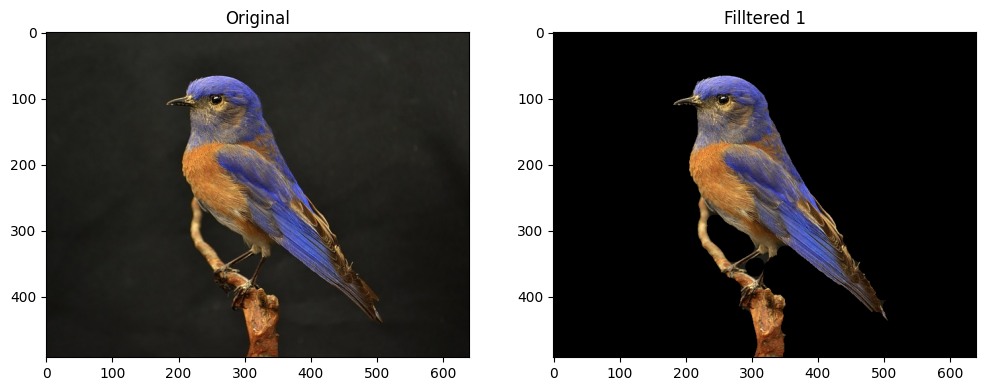

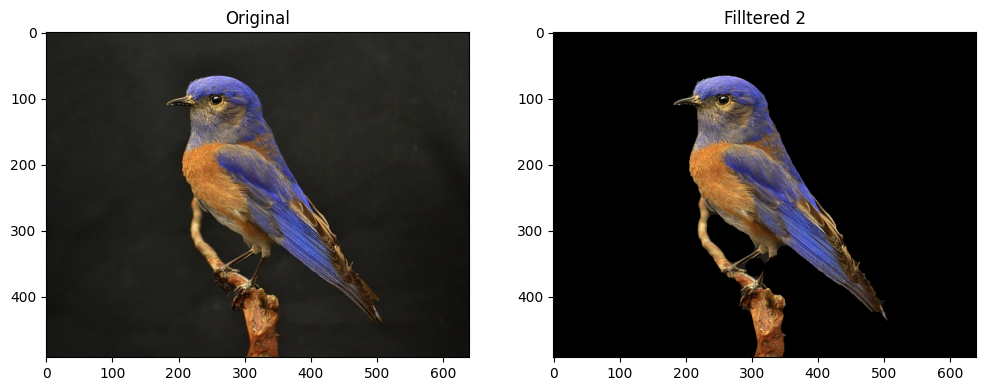

In [42]:
img = imread("images/bird.jpg")
img_new1 = immask1(img, bird_mask_final)
img_new2 = immask2(img, bird_mask_final)

plt.figure(figsize=(12, 6))
plt.subplot(1,2,1) 
plt.imshow(img)
plt.title('Original')
plt.subplot(1,2,2) 
plt.imshow(img_new1)
plt.title("Filltered 1")
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(1,2,1) 
plt.imshow(img)
plt.title('Original')
plt.subplot(1,2,2) 
plt.imshow(img_new2)
plt.title("Filltered 2")
plt.show()


### d) Create a mask from the image in file eagle.jpg and visualize the result with immask.

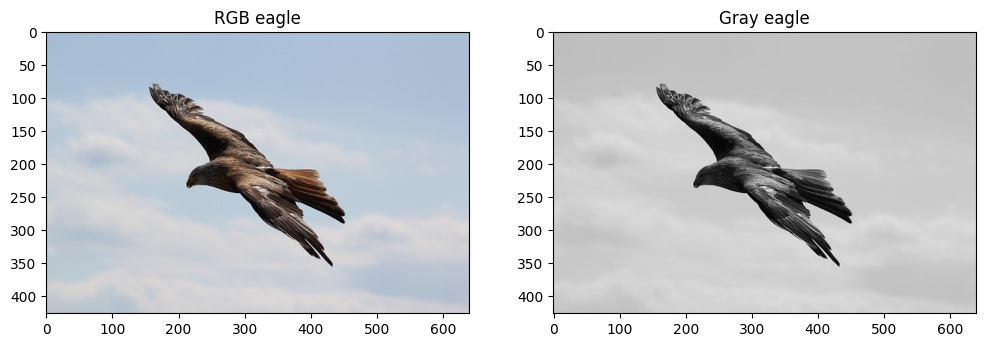

In [43]:
eagle = imread("images/eagle.jpg")
eagle_gray = convert_to_gray(eagle)

plt.figure(figsize=(12, 6))
plt.subplot(1,2,1) 
plt.imshow(eagle)
plt.title('RGB eagle')
plt.subplot(1,2,2) 
plt.imshow(eagle_gray, cmap="gray")
plt.title("Gray eagle")
plt.show()


0.49411764705882355


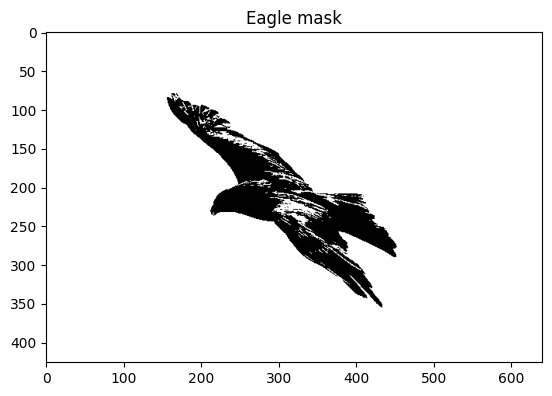

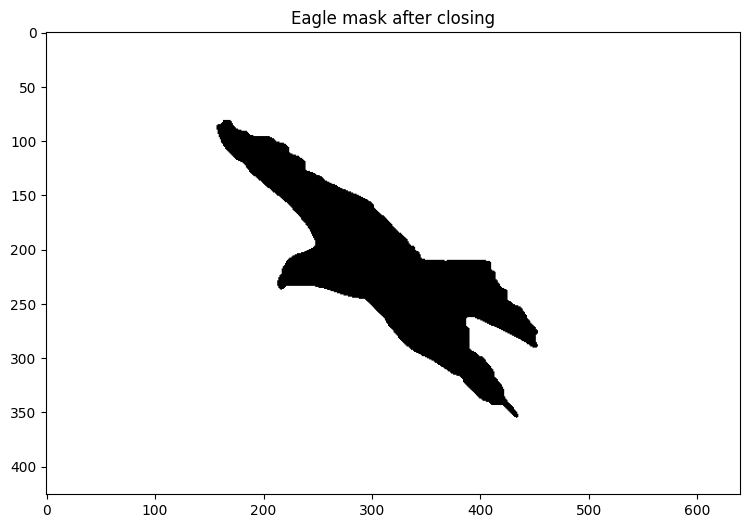

In [44]:
eagle_threshold = otsu(eagle_gray)
print(eagle_threshold)
eagle_mask = make_mask(eagle_gray, eagle_threshold)
plt.imshow(eagle_mask, cmap="gray")
plt.title("Eagle mask")
plt.show()



n=10
SE = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(n,n))
eagle_mask_final = cv2.morphologyEx(eagle_mask,cv2.MORPH_OPEN, SE)


plt.figure(figsize=(12, 6))
plt.imshow(eagle_mask_final, cmap="gray")
plt.title("Eagle mask after closing")
plt.show()

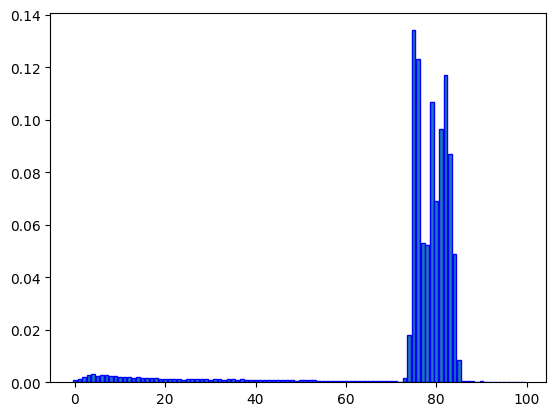

In [45]:
H100 = myhist_upgrade(eagle_gray, 100)
plt.bar(range(100), H100, edgecolor='blue')
plt.show()

In [46]:
def make_mask_upgrade(image, threshold):
    H = myhist(image,100)
    i = int(threshold*100)
    left = np.sum(H[0:i])
    right = np.sum(H[i:100])
    
    mask = np.copy(image)

    if left > right:
        mask = np.where(mask < threshold, 0, 1)
    else:
        mask = np.where(mask < threshold, 1, 0)
        
    return mask.astype(np.float64)



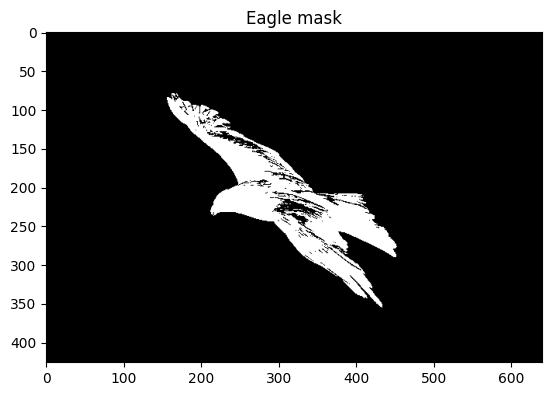

In [47]:
eagle_mask_upgrade = make_mask_upgrade(eagle_gray, eagle_threshold)
plt.imshow(eagle_mask_upgrade, cmap="gray")
plt.title("Eagle mask")
plt.show()


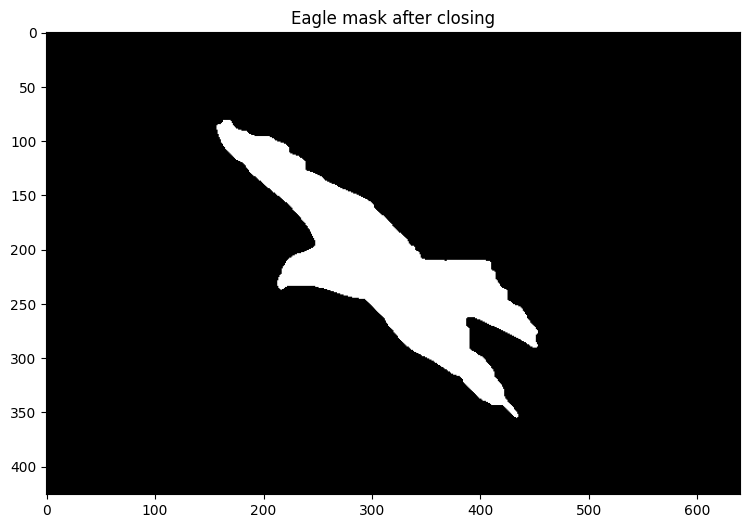

In [48]:
n=5
SE = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(n,n))
eagle_mask_final = cv2.morphologyEx(eagle_mask_upgrade,cv2.MORPH_CLOSE, SE)
n=10
SE = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(n,n))
eagle_mask_final = cv2.morphologyEx(eagle_mask_final,cv2.MORPH_CLOSE, SE)

plt.figure(figsize=(12, 6))
plt.imshow(eagle_mask_final, cmap="gray")
plt.title("Eagle mask after closing")
plt.show()

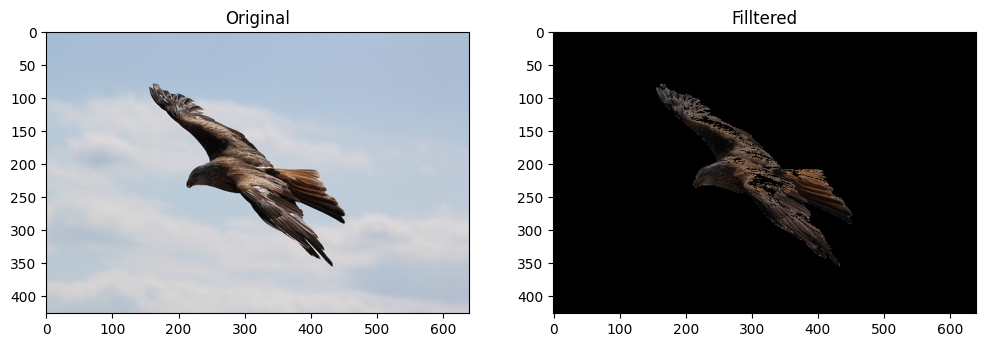

In [49]:
eagle_filltered = immask2(eagle, eagle_mask_upgrade)

plt.figure(figsize=(12, 6))
plt.subplot(1,2,1) 
plt.imshow(eagle)
plt.title('Original')
plt.subplot(1,2,2) 
plt.imshow(eagle_filltered)
plt.title("Filltered")
plt.show()


### e) Extract connected components

0.7411764705882353


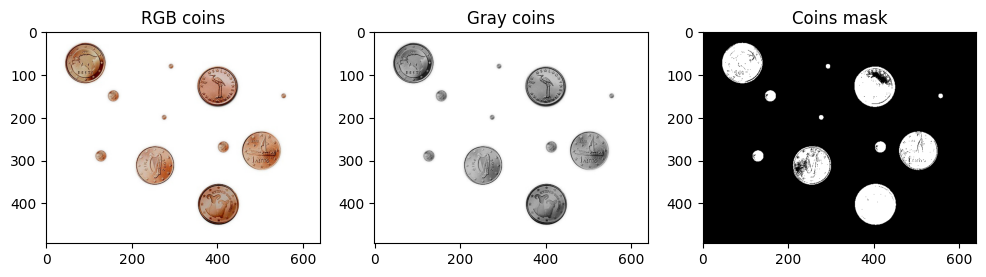

In [50]:
coins = imread("images/coins.jpg")
coins_gray = convert_to_gray(coins)

plt.figure(figsize=(12, 6))
plt.subplot(1,3,1) 
plt.imshow(coins)
plt.title('RGB coins')
plt.subplot(1,3,2) 
plt.imshow(coins_gray, cmap="gray")
plt.title("Gray coins")


coins_threshold = otsu(coins_gray)
print(coins_threshold)
coins_mask = make_mask_upgrade(coins_gray, coins_threshold)
plt.subplot(1,3,3) 
plt.imshow(coins_mask, cmap="gray")
plt.title("Coins mask")
plt.show()


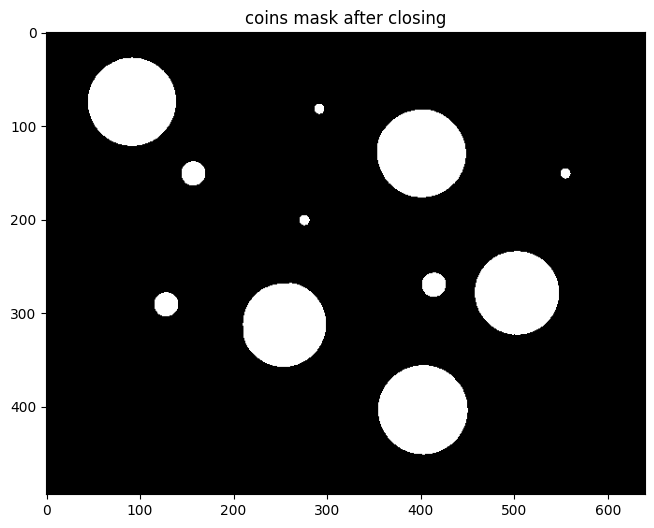

In [51]:
n=25
SE = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(n,n))
coins_mask_final = cv2.morphologyEx(coins_mask,cv2.MORPH_CLOSE, SE)

plt.figure(figsize=(12, 6))
plt.imshow(coins_mask_final, cmap="gray")
plt.title("coins mask after closing")
plt.show()

In [52]:
n, labels, stats, centroids = cv2.connectedComponentsWithStats(coins_mask_final.astype(np.uint8))

In [53]:
filltered = coins_mask_final.copy()

for i in range(1, n): 
    area = stats[i, cv2.CC_STAT_AREA]
    if area > 700:
        figs = (labels == i)
        filltered[figs] = 0

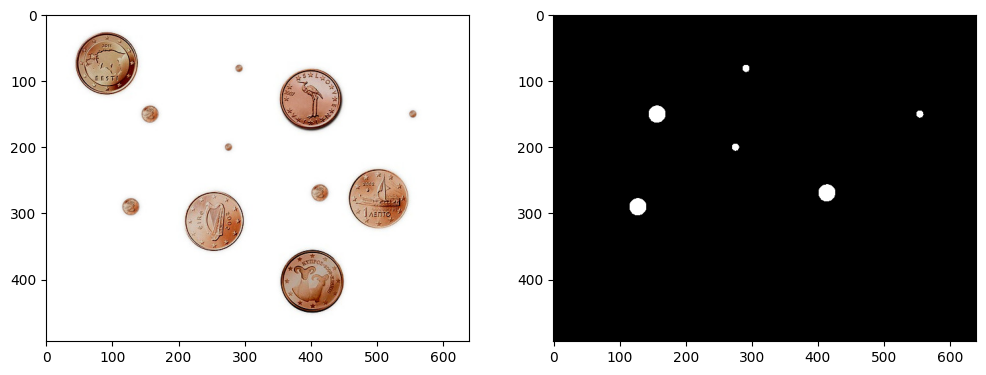

In [54]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1) 
plt.imshow(coins)
plt.subplot(1,2,2) 
plt.imshow(filltered, cmap="gray")
plt.show()
